### Problem 1

In [131]:
from math import sqrt

def euclidean_distance(row1, row2):
    dim = len(row1)

    distance = 0

    for d in range(dim):
        distance += abs(row1[d] - row2[d])**2

    distance = sqrt(distance)
    return distance

In [132]:
import pandas as pd
import numpy as np 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import csv

with open("yeast.data.txt") as input_file:
    lines = input_file.readlines()
    newLines = []
    for line in lines:
        newLine = line.strip().split()
        newLines.append(newLine)

with open("yeast.csv", "w") as test_file:
    file_writer = csv.writer(test_file)
    file_writer.writerows(newLines)

dataset = pd.read_csv("yeast.csv")
dataset.columns = ["Sequence Name", "mcg", "gvh", "alm", "mit","erl","pox","vac","nuc","className"]
dataset.drop(labels="Sequence Name", axis=1, inplace=True)

unique = set(dataset.iloc()[:,-1])

lookup = dict()
for i,value in enumerate(unique):
    lookup[value] = i

for index, row in dataset.iterrows():
    row[-1] = lookup[row[-1]]
    dataset.loc[index,"className"] = row[-1]

dataset.head()


,mcg,gvh,alm,mit,erl,pox,vac,nuc,className
0,0.43,0.67,0.48,0.27,0.5,0.0,0.53,0.22,4
1,0.64,0.62,0.49,0.15,0.5,0.0,0.53,0.22,4
2,0.58,0.44,0.57,0.13,0.5,0.0,0.54,0.22,1
3,0.42,0.44,0.48,0.54,0.5,0.0,0.48,0.22,4
4,0.51,0.40,0.56,0.17,0.5,0.5,0.49,0.22,5


In [133]:
X = dataset.drop('className', axis=1)
Y = dataset.className
print(X)
print(Y)
print(X.shape)
print(Y.shape)

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.33, random_state=42)

scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

       mcg   gvh   alm   mit  erl  pox   vac   nuc
0     0.43  0.67  0.48  0.27  0.5  0.0  0.53  0.22
1     0.64  0.62  0.49  0.15  0.5  0.0  0.53  0.22
2     0.58  0.44  0.57  0.13  0.5  0.0  0.54  0.22
3     0.42  0.44  0.48  0.54  0.5  0.0  0.48  0.22
4     0.51  0.40  0.56  0.17  0.5  0.5  0.49  0.22
...    ...   ...   ...   ...  ...  ...   ...   ...
1478  0.81  0.62  0.43  0.17  0.5  0.0  0.53  0.22
1479  0.47  0.43  0.61  0.40  0.5  0.0  0.48  0.47
1480  0.67  0.57  0.36  0.19  0.5  0.0  0.56  0.22
1481  0.43  0.40  0.60  0.16  0.5  0.0  0.53  0.39
1482  0.65  0.54  0.54  0.13  0.5  0.0  0.53  0.22

[1483 rows x 8 columns]
0       4
1       4
2       1
3       4
4       5
       ..
1478    2
1479    1
1480    2
1481    1
1482    5
Name: className, Length: 1483, dtype: object
(1483, 8)
(1483,)
(993, 8)
(993,)
(490, 8)
(490,)


In [134]:
def knn_predict(x_train, x_test, y_train, y_test, k):
    from collections import Counter

    y_hat_test = []

    for test_point in x_test:
        distances = []

        for train_point in x_train:
            distance = euclidean_distance(test_point, train_point)
            distances.append(distance)

        df_dists = pd.DataFrame(data=distances, columns=['dist'], index=y_train.index)

        df_nn = df_dists.sort_values(by=['dist'], axis=0)[:k]
        counter = Counter(y_train[df_nn.index])

        prediction = counter.most_common()[0][0]

        y_hat_test.append(prediction)
    
    return y_hat_test

In [144]:
from sklearn.metrics import accuracy_score

accuracies = []
for k in range(1, 100):
    y_hat_test = knn_predict(x_train, x_test, y_train, y_test, k=k)
    accuracies.append((k, accuracy_score(y_test.values.astype('float'), np.asarray(y_hat_test).astype('float'))))

print(accuracies)

[(1, 0.5346938775510204), (2, 0.5346938775510204), (3, 0.5693877551020409), (4, 0.5693877551020409), (5, 0.5673469387755102), (6, 0.563265306122449), (7, 0.5755102040816327), (8, 0.5897959183673469), (9, 0.6), (10, 0.5836734693877551), (11, 0.6020408163265306), (12, 0.5897959183673469), (13, 0.6), (14, 0.6081632653061224), (15, 0.6183673469387755), (16, 0.6142857142857143), (17, 0.6061224489795919), (18, 0.6040816326530613), (19, 0.6020408163265306), (20, 0.610204081632653), (21, 0.6081632653061224), (22, 0.6), (23, 0.6040816326530613), (24, 0.6020408163265306), (25, 0.5938775510204082), (26, 0.6), (27, 0.6020408163265306), (28, 0.6020408163265306), (29, 0.6), (30, 0.6), (31, 0.6), (32, 0.6081632653061224), (33, 0.6061224489795919), (34, 0.610204081632653), (35, 0.6040816326530613), (36, 0.610204081632653), (37, 0.6020408163265306), (38, 0.6), (39, 0.5979591836734693), (40, 0.6020408163265306), (41, 0.5918367346938775), (42, 0.5959183673469388), (43, 0.6), (44, 0.5959183673469388), (45

In [150]:
best_k = max(accuracies, key=lambda tup: tup[1])

y_hat_test = knn_predict(x_train, x_test, y_train, y_test, best_k[0])
print(accuracy_score(y_test.values.astype("float"), np.asarray(y_hat_test).astype("float")))

0.6183673469387755


### Problem 5

In [221]:
from scipy import stats
from scipy.special import logsumexp

def get_random_psd(n):
    x = np.random.normal(0,1,size=(n,n))
    return np.dot(x, x.transpose())

def initialize_random_params():
    params = {'phi': np.random.uniform(0,1),
              'mu0': np.random.normal(0, 1, size=(2,)),
              'mu1': np.random.normal(0, 1, size=(2,)),
              'sigma0': get_random_psd(2),
              'sigma1': get_random_psd(2)}
    return params

def learn_params(x_labeled, y_labeled):
    n = x_labeled.shape[0]
    phi = x_labeled[y_labeled == 1].shape[0] / n
    mu0 = np.sum(x_labeled[y_labeled == 0], axis=0) / x_labeled[y_labeled == 0].shape[0]
    mu1 = np.sum(x_labeled[y_labeled == 1], axis=0) / x_labeled[y_labeled == 1].shape[0]
    sigma0 = np.cov(x_labeled[y_labeled == 0].T, bias= True)
    sigma1 = np.cov(x_labeled[y_labeled == 1].T, bias=True)
    return {'phi': phi, 'mu0': mu0, 'mu1': mu1, 'sigma0': sigma0, 'sigma1': sigma1}

In [218]:
def expectation(x, params):
    np.log([stats.multivariate_normal(params["mu0"], params["sigma0"]).pdf(x),
            stats.multivariate_normal(params["mu1"], params["sigma1"]).pdf(x)])
    log_p_y_x = np.log([1-params["phi"], params["phi"]])[np.newaxis, ...] + \
                np.log([stats.multivariate_normal(params["mu0"], params["sigma0"]).pdf(x),
            stats.multivariate_normal(params["mu1"], params["sigma1"]).pdf(x)]).T
    log_p_y_x_norm = logsumexp(log_p_y_x, axis=1)
    return log_p_y_x_norm, np.exp(log_p_y_x - log_p_y_x_norm[..., np.newaxis])

def maximization(x, params):
    total_count = x.shape[0]
    _, heuristics = expectation(x, params)
    heuristic0 = heuristics[:, 0]
    heuristic1 = heuristics[:, 1]
    sum_heuristic1 = np.sum(heuristic1)
    sum_heuristic0 = np.sum(heuristic0)
    phi = (sum_heuristic1/total_count)
    mu0 = (heuristic0[..., np.newaxis].T.dot(x)/sum_heuristic0).flatten()
    mu1 = (heuristic1[..., np.newaxis].T.dot(x)/sum_heuristic1).flatten()
    diff0 = x - mu0
    sigma0 = diff0.T.dot(diff0 * heuristic0[..., np.newaxis]) / sum_heuristic0
    diff1 = x - mu1
    sigma1 = diff1.T.dot(diff1 * heuristic1[..., np.newaxis]) / sum_heuristic1
    params = {'phi': phi, 'mu0': mu0, 'mu1': mu1, 'sigma0': sigma0, 'sigma1': sigma1}
    return params

def get_avg_log_likelihood(x, params):
    loglikelihood, _ = expectation(x, params)
    return np.mean(loglikelihood)

In [235]:
def EM(x, params, nIter):
    avg_loglikelihoods = []
    for _ in range(nIter):
        avg_loglikelihood = get_avg_log_likelihood(x, params)
        avg_loglikelihoods.append(avg_loglikelihood)
        params = maximization(x, params)
    print("phi: %s\nmu_0: %s\nmu_1: %s\nsigma_0: %s\nsigma_1: %s"
               % (params['phi'], params['mu0'], params['mu1'], params['sigma0'], params['sigma1']))
    _, posterior = expectation(x, params)
    forecasts = np.argmax(posterior, axis=1)
    return forecasts, posterior, avg_loglikelihoods

phi: 0.8334961777533998
mu_0: [ 2.99928776 -3.11473883]
mu_1: [-0.76209504  0.60046084]
sigma_0: [[0.75133453 0.02155862]
 [0.02155862 0.77614504]]
sigma_1: [[7.22312872 2.318697  ]
 [2.318697   7.35536474]]
total steps:  50


Text(0.5, 1.0, 'log likelihoods')

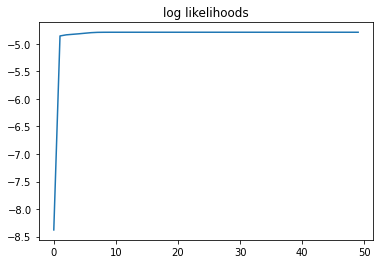

In [236]:
data5 = pd.read_csv("a4-q5-data/multigauss.txt", sep=",", header=None)
data5.columns = ["x1","x2"]
x = data5[["x1","x2"]].values

random_params = initialize_random_params()
forecast, posterior, loglikelihoods = EM(x, random_params,50)
print("total steps: ", len(loglikelihoods))
plt.plot(loglikelihoods)
plt.title("log likelihoods")


### Problem 6

In [151]:
import numpy 
def to_one_hot(y, num_class=10):
    y_vec = numpy.zeros((y.shape[0],10))
    for i in range(len(y)):
        y_vec[i][y[i]] = 1
    return y_vec

In [152]:
import pickle, gzip

# Load the dataset
f = gzip.open('mnist.pkl.gz', 'rb')
u = pickle._Unpickler(f)
u.encoding = 'latin1'
train_set, valid_set, test_set = u.load()
f.close

x_train = train_set[0]
y_train = train_set[1]

x_valid = valid_set[0]
y_valid = valid_set[1]

x_test = valid_set[0]
y_test = valid_set[1]

x_train = x_train.reshape((x_train.shape[0],28,28,1))
x_valid = x_valid.reshape((x_valid.shape[0],28,28,1))
x_test = x_test.reshape((x_test.shape[0],28,28,1))
y_train_vec = to_one_hot(y_train)
y_valid_vec = to_one_hot(y_valid)
y_test_vec = to_one_hot(y_test)


print(x_train.shape)
print(x_valid.shape)
print(x_test.shape)
print(y_train_vec.shape)
print(y_valid_vec.shape)
print(y_test_vec.shape)

(50000, 28, 28, 1)
(10000, 28, 28, 1)
(10000, 28, 28, 1)
(50000, 10)
(10000, 10)
(10000, 10)


In [187]:
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from keras.models import Sequential

model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(28,28,1)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax'))

model.summary()

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_39 (Conv2D)           (None, 28, 28, 32)        320       
_________________________________________________________________
max_pooling2d_23 (MaxPooling (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_40 (Conv2D)           (None, 14, 14, 64)        18496     
_________________________________________________________________
max_pooling2d_24 (MaxPooling (None, 7, 7, 64)          0         
_________________________________________________________________
flatten_9 (Flatten)          (None, 3136)              0         
_________________________________________________________________
dense_18 (Dense)             (None, 128)               401536    
_________________________________________________________________
dense_19 (Dense)             (None, 10)              

In [188]:
from keras import optimizers
from keras.callbacks import EarlyStopping


learning_rate = 0.001 # to be tuned!

model.compile(loss='categorical_crossentropy',
              optimizer=optimizers.RMSprop(learning_rate=learning_rate),
              metrics=['acc'])

In [189]:
es = EarlyStopping(monitor='val_loss', mode='auto', patience=5)
history = model.fit(x_train, y_train_vec, batch_size=32, epochs=50, validation_data=(x_valid, y_valid_vec), callbacks=[es])

Epoch 1/50
1563/1563 [==============================] - 27s 17ms/step - loss: 0.2777 - acc: 0.9123 - val_loss: 0.0489 - val_acc: 0.9868
Epoch 2/50
1563/1563 [==============================] - 27s 17ms/step - loss: 0.0474 - acc: 0.9853 - val_loss: 0.0482 - val_acc: 0.9863
Epoch 3/50
1563/1563 [==============================] - 27s 17ms/step - loss: 0.0289 - acc: 0.9918 - val_loss: 0.0492 - val_acc: 0.9878
Epoch 4/50
1563/1563 [==============================] - 27s 17ms/step - loss: 0.0246 - acc: 0.9924 - val_loss: 0.0391 - val_acc: 0.9899
Epoch 5/50
1563/1563 [==============================] - 25s 16ms/step - loss: 0.0183 - acc: 0.9943 - val_loss: 0.0493 - val_acc: 0.9886
Epoch 6/50
1563/1563 [==============================] - 25s 16ms/step - loss: 0.0142 - acc: 0.9963 - val_loss: 0.0426 - val_acc: 0.9910
Epoch 7/50
1563/1563 [==============================] - 26s 17ms/step - loss: 0.0116 - acc: 0.9964 - val_loss: 0.0678 - val_acc: 0.9893
Epoch 8/50
1563/1563 [==========================

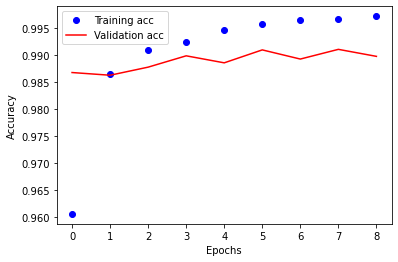

In [190]:

import matplotlib.pyplot as plt
%matplotlib inline

acc = history.history['acc']
val_acc = history.history['val_acc']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [191]:
loss_and_acc = model.evaluate(x_test, y_test_vec)
print('loss = ' + str(loss_and_acc[0]))
print('accuracy = ' + str(loss_and_acc[1]))

313/313 [==============================] - 1s 3ms/step - loss: 0.0582 - acc: 0.9898
loss = 0.05815191566944122
accuracy = 0.989799976348877
